In [37]:
ENV["JULIA_PKG_SERVER"] = ""

using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [38]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; class_probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; class_probs, type, rng=42)

((Column1 = [-0.005995544503607245, 0.037904144693658326, 0.019800558687029943, 0.03206785093279974, 0.16031997776253862, 0.014001913214292446, -0.02951780377514604, 0.37672097013130923, 0.35759244012532665, -0.007342376422005713  …  0.1697242670509605, 0.011740503957204617, 0.7431463208154918, 0.01566227318654113, -0.026641690755336803, 0.7771890762454217, 0.30521630610933675, 0.04026371845021709, 0.3775843915944497, 0.07045533556265351], Column2 = [0.3275797756084372, 0.10375165363407776, -0.25511370327025124, 0.09652606363280114, 0.9796877539892057, 0.18150518217765355, 0.23645146444377432, 1.8779022705592523, 1.5752974934615762, 0.1691195759662617  …  1.923441286424072, -0.02725505867258962, 1.5861341164850242, -0.190906971873139, -0.07243540717224706, 1.8226913372171263, 0.8695534248336851, -0.2324804547825487, 1.7420322587243864, 0.21405107770939452], Column3 = [0.8154888599595975, 0.67767690321742, 0.5169974917845415, 0.7051143845952035, 0.2930588044525435, 0.6461943978395572, 0

### 2. Apply RandomOversampler

#### Using Imbalance Only

In [39]:
Xover, yover = random_oversample(X, y; ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

((Column1 = [-0.005995544503607245, 0.037904144693658326, 0.019800558687029943, 0.03206785093279974, 0.16031997776253862, 0.014001913214292446, -0.02951780377514604, 0.37672097013130923, 0.35759244012532665, -0.007342376422005713  …  0.26052562177609606, 0.7205151980634492, 0.1697242670509605, 0.549287701290591, 0.37672097013130923, 0.35759244012532665, 0.5863375408075497, 0.9426325705020218, 0.5863375408075497, 0.7205151980634492], Column2 = [0.3275797756084372, 0.10375165363407776, -0.25511370327025124, 0.09652606363280114, 0.9796877539892057, 0.18150518217765355, 0.23645146444377432, 1.8779022705592523, 1.5752974934615762, 0.1691195759662617  …  1.5132148339252465, 1.8817335957355006, 1.923441286424072, 1.5277560777975236, 1.8779022705592523, 1.5752974934615762, 1.4487227761199744, 2.4737772513129532, 1.4487227761199744, 1.8817335957355006], Column3 = [0.8154888599595975, 0.67767690321742, 0.5169974917845415, 0.7051143845952035, 0.2930588044525435, 0.6461943978395572, 0.626192987290

#### Using MLJ

In [40]:
naive_model = Imbalance.MLJ.RandomOversampler(ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(naive_model)
Xover, yover = transform(mach, X, y)

((Column1 = [-0.005995544503607245, 0.037904144693658326, 0.019800558687029943, 0.03206785093279974, 0.16031997776253862, 0.014001913214292446, -0.02951780377514604, 0.37672097013130923, 0.35759244012532665, -0.007342376422005713  …  0.26052562177609606, 0.7205151980634492, 0.1697242670509605, 0.549287701290591, 0.37672097013130923, 0.35759244012532665, 0.5863375408075497, 0.9426325705020218, 0.5863375408075497, 0.7205151980634492], Column2 = [0.3275797756084372, 0.10375165363407776, -0.25511370327025124, 0.09652606363280114, 0.9796877539892057, 0.18150518217765355, 0.23645146444377432, 1.8779022705592523, 1.5752974934615762, 0.1691195759662617  …  1.5132148339252465, 1.8817335957355006, 1.923441286424072, 1.5277560777975236, 1.8779022705592523, 1.5752974934615762, 1.4487227761199744, 2.4737772513129532, 1.4487227761199744, 1.8817335957355006], Column3 = [0.8154888599595975, 0.67767690321742, 0.5169974917845415, 0.7051143845952035, 0.2930588044525435, 0.6461943978395572, 0.626192987290

#### Using TableTransforms

In [41]:
using Imbalance: TableTransforms.RandomOversampler
naive_model_t = RandomOversampler(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [-0.05409305855863929, 0.1624308026961822, -0.004851506123528505, 0.02145323287890314, 0.430435087521884, 0.08039332183658131, 0.061389860389434836, 0.21422524957370315, 0.8706987890588715, 0.15602092977030593  …  0.7547958353430522, 0.5294542123316521, 0.7875630085211702, 0.3984099142353007, 0.21422524957370315, 0.8706987890588715, 0.6938338451902964, 0.6554571941649951, 0.6938338451902964, 0.5294542123316521],
 Column2 = [-0.10241392585303769, 0.055604593990013475, 0.09975151883324035, -0.18050686491512336, 0.9350115472194549, -0.03229377795204817, 0.026125349817044397, 1.7413577908674958, 1.665373684399604, -0.09628053204553044  …  1.4447132171861783, 1.7549923280228108, 1.6501563862638422, 2.106219514592594, 1.7413577908674958, 1.665373684399604, 1.9326376810680677, 1.8025202699113285, 1.9326376810680677, 1.7549923280228108],
 Column3 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.6517697743521925,

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


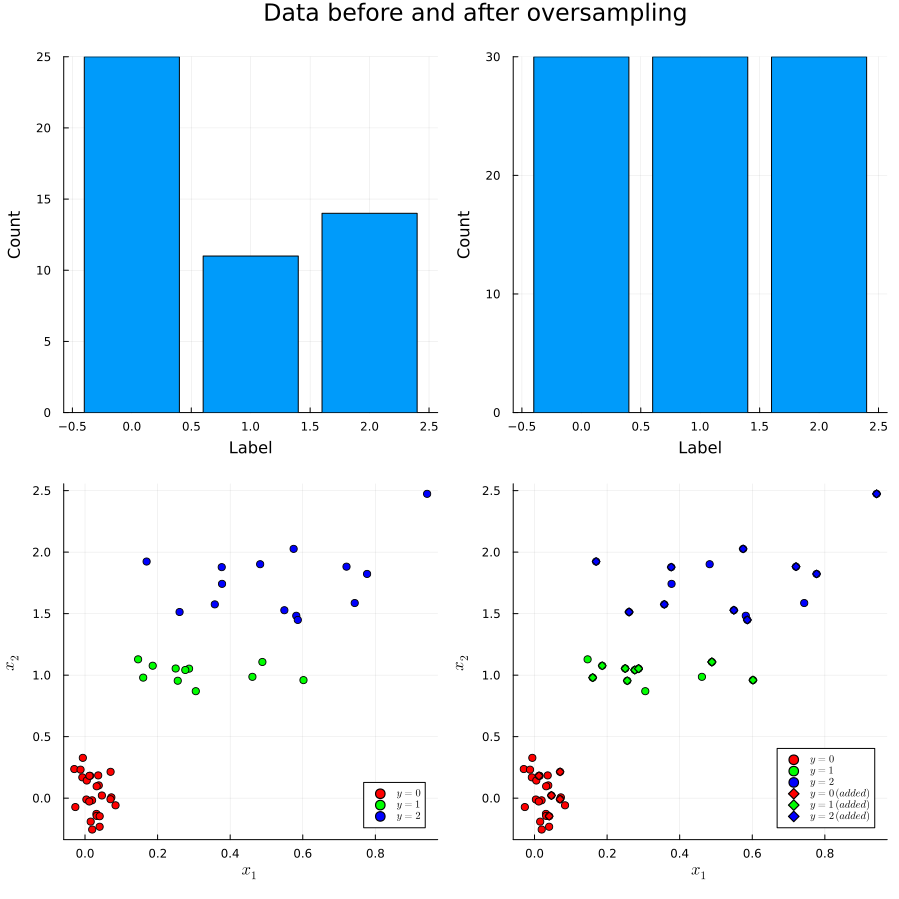

In [42]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)

Observe that there is no difference since this is naive random oversampling which operates by simply replicating examples.